# 環境構築



*   Pythonモジュールへのパス追加





In [ ]:
!pwd

In [ ]:
# import os

# os.chdir("/mnt/MachineLearning")

In [1]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

# データ取り込み

In [2]:
import pandas as pd

df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20230112.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
0,office1_0_0,office1,0.0,0.0,off,2991.405667
1,office1_0_123_aout,office1,0.0,123.0,a,2656.982333
2,office1_0_123_bout,office1,0.0,123.0,b,2951.144667
3,office1_0_164_aout,office1,0.0,164.0,a,2470.395667
4,office1_0_164_bout,office1,0.0,164.0,b,3271.053000
...,...,...,...,...,...,...
902,office33_960_164_bout,office33,960.0,164.0,b,2504.354667
903,office33_960_246_aout,office33,960.0,246.0,a,1331.682000
904,office33_960_246_bout,office33,960.0,246.0,b,1495.644000
905,office33_960_82_aout,office33,960.0,82.0,a,2227.621000


In [3]:
from data_test import test_DataFrame

# DataFrame内で、ケース名と説明変数の間に齟齬がないかをテスト
test_DataFrame(df_summary)

In [4]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,countTimeMean_onlyFloating,exhaust_a,exhaust_b,exhaust_off
0,office1_0_0,office1,0.0,0.0,2991.405667,0,0,1
1,office1_0_123_aout,office1,0.0,123.0,2656.982333,1,0,0
2,office1_0_123_bout,office1,0.0,123.0,2951.144667,0,1,0
3,office1_0_164_aout,office1,0.0,164.0,2470.395667,1,0,0
4,office1_0_164_bout,office1,0.0,164.0,3271.053000,0,1,0
...,...,...,...,...,...,...,...,...
902,office33_960_164_bout,office33,960.0,164.0,2504.354667,0,1,0
903,office33_960_246_aout,office33,960.0,246.0,1331.682000,1,0,0
904,office33_960_246_bout,office33,960.0,246.0,1495.644000,0,1,0
905,office33_960_82_aout,office33,960.0,82.0,2227.621000,1,0,0


In [5]:
df_total = df_total.set_index('case_name')

In [6]:
# ビニング処理

# 感染リスクの指標（実数値）を４分位数で分割してカテゴライズ
# labels=False: index_labeling
# df_total["n_from2sec/S_bin"] = pd.qcut(df_total["n_from2sec/S"], 4, labels=False)
# df_total["countTimeMean_bin"] = pd.qcut(df_total["countTimeMean_onlyFloating"], 4, labels=False)

# 最大最小区間を等間隔にビニング
# df_total["countTimeMean_bin"] = pd.cut(df_total["countTimeMean_onlyFloating"], 4, labels=False)


# df_total

In [7]:
# df_total["countTimeMean_bin"].value_counts()

In [8]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [9]:
df_total.std(numeric_only=True)

aircon                        358.283680
ventilation                    84.242823
countTimeMean_onlyFloating    564.993977
exhaust_a                       0.495347
exhaust_b                       0.495347
exhaust_off                     0.347201
dtype: float64

In [10]:
from sklearn import preprocessing

# meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252
office1_0_123_aout,-1.387753,-0.204554,1.151365,-0.868534,-0.403510
office1_0_123_bout,-1.387753,-0.204554,-0.868534,1.151365,-0.403510
office1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510
...,...,...,...,...,...
office33_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.403510
office33_960_246_aout,1.293167,1.256316,1.151365,-0.868534,-0.403510
office33_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.403510


In [12]:
# df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S", "countTimeMean_sit2stand"]])
# df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_bin"]])
df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_onlyFloating"]])

# 機械学習に用いるDataFrame
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252,office1,2991.405667
office1_0_123_aout,-1.387753,-0.204554,1.151365,-0.868534,-0.403510,office1,2656.982333
office1_0_123_bout,-1.387753,-0.204554,-0.868534,1.151365,-0.403510,office1,2951.144667
office1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510,office1,2470.395667
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office1,3271.053000
...,...,...,...,...,...,...,...
office33_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.403510,office33,2504.354667
office33_960_246_aout,1.293167,1.256316,1.151365,-0.868534,-0.403510,office33,1331.682000
office33_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.403510,office33,1495.644000


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- body: 約26500

In [13]:
# 点群データNPYファイルへのパス
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

In [14]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()    # 0-D Array をひとつのオブジェクトに変換
pointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

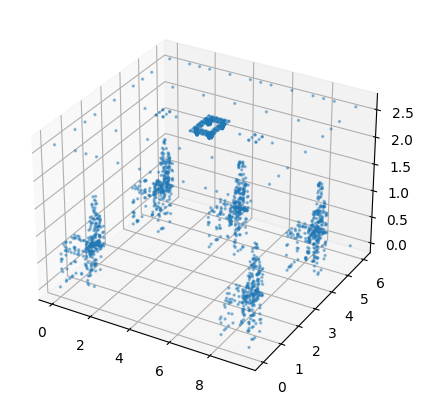

In [15]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    """
    点群データ（２次元配列）をプロット
    """
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office33'])

In [16]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [17]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [ ]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [ ]:
# def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
#     """
#     Return a certain office Dataset.
#     You can specify List of offices.
#     """
    
#     df_main = pd.DataFrame()
    
#     for officename in officename_list:
#         df = df_core[ df_core["office"]==officename ]
#         df_main = pd.concat([df_main, df])
        
#     if shuffle:
#         df_main = df_main.sample(frac=1, random_state=0)
        
#     # meke Dictionary of pointCloudList in order of MainDataFrame
#     pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
#     for officename in df_main["office"]:
#         for key, pc_list in pc_list_dict.items():
#             pc_list.append(pointCloud_dict[officename][key])
            
#     # make input-Dictionary and to ND-Array
#     input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
#     for key, pc in pc_list_dict.items():
#         input_dict[f"pointCloud_{key}"] = np.array(pc)
                
#     return input_dict, df_main["countTimeMean_sit2stand"]
        

In [18]:
def standardization(x:np.array, axis=None, ddof=0):
    x_mean = x.mean(axis=axis, keepdims=True)
    x_std = x.std(axis=axis, keepdims=True, ddof=ddof)
    return (x - x_mean) / x_std

In [19]:
def get_officeDataset(
    officename_list:list,
    df_core:pd.DataFrame,
    pointCloud_dict:dict,
    objective_col:str,
    shuffle:bool,
    standardize_pointCloud=True
):
    """
    全体データから、特定のオフィスおけるデータセットを返す。
    
    Parameters
    ----------
    officename_list:list
        オフィス名のリスト
        
    df_core:pd.DataFrame
        主要なDataFrame
        
    pointCloud_dict:dict
        点群の辞書
        
    objective_col:str
        目的変数の列名
        
    shuffle:bool
        データセットをシャッフルするかどうか
        
    standardize_pointCloud=True
        点群データを標準化するか否か
        
    Returns
    -------
    input_dict : dict
        機械学習に入力するデータの辞書。メタデータと点群データが詰まっている
        
    objective_ser : pd．Series
        目的変数のSeriesオブジェクト
        
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list = []
    for officename in df_main["office"]:
        pc_list.append(pointCloud_dict[officename])
        
    pc_array = np.array(pc_list)
    
    if standardize_pointCloud:
        # pc_array = standardization(pc_array)
        a = pc_array.reshape(-1,3)
        a_standardized = standardization(a, axis=0)
        pc_array = a_standardized.reshape(pc_array.shape)
            
    # make input-Dictionary and to ND-Array
    input_dict = {
        "meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]],
        "pointCloud":pc_array,
    }
                
    # return input_dict, df_main["countTimeMean_sit2stand"]
    # return input_dict, df_main["n_from2sec/S"]
    return input_dict, df_main[objective_col]
        

In [20]:
X_dict_sample, y_sample = get_officeDataset(
    list(df_ml["office"].unique()),
    df_ml, pointCloud_dict, "countTimeMean_onlyFloating",
    standardize_pointCloud=True,
    shuffle=True
)

In [21]:
X_dict_sample

{'meta':                          aircon  ventilation  exhaust_a  exhaust_b  \
 case_name                                                            
 office9_660_164_bout   0.455379     0.282403  -0.868534   1.151365   
 office17_0_164_aout   -1.387753     0.282403   1.151365  -0.868534   
 office18_360_164_bout -0.382408     0.282403  -0.868534   1.151365   
 office17_960_82_aout   1.293167    -0.691511   1.151365  -0.868534   
 office5_960_0          1.293167    -1.665425  -0.868534  -0.868534   
 ...                         ...          ...        ...        ...   
 office31_360_82_aout  -0.382408    -0.691511   1.151365  -0.868534   
 office7_360_82_bout   -0.382408    -0.691511  -0.868534   1.151365   
 office23_0_164_bout   -1.387753     0.282403  -0.868534   1.151365   
 office20_660_164_bout  0.455379     0.282403  -0.868534   1.151365   
 office25_0_164_aout   -1.387753     0.282403   1.151365  -0.868534   
 
                        exhaust_off  
 case_name                   

In [22]:
y_sample

case_name
office9_660_164_bout     2120.489333
office17_0_164_aout      2312.477333
office18_360_164_bout    1112.169333
office17_960_82_aout     1891.114000
office5_960_0            1147.780000
                            ...     
office31_360_82_aout     2337.101333
office7_360_82_bout      1633.948000
office23_0_164_bout      3480.733667
office20_660_164_bout    2360.097667
office25_0_164_aout      2011.997000
Name: countTimeMean_onlyFloating, Length: 907, dtype: float64

In [23]:
y_sample.nunique()

907

In [ ]:
# def get_dataset(df_main, df_meta):
#     '''
#     説明変数と目的変数をNDArrayに変換する
#     '''
    
#     pc_aircon_list = []
#     pc_airvent_list = []
#     pc_body_list = []
#     pc_layout_list = []
    
#     metaArray_list = []

#     RoI_list = []

#     for index, row in df_total.iterrows():
#         office_name = row["office"]
#         pc_aircon_list.append(pointCloud_dict[office_name]["aircon"])
#         pc_airvent_list.append(pointCloud_dict[office_name]["airvent"])
#         pc_body_list.append(pointCloud_dict[office_name]["body"])
#         pc_layout_list.append(pointCloud_dict[office_name]["layout"])
        
#         metaArray_list.append(df_meta_standardized.loc[index])
            
#         RoI_list.append(df_main["countTimeMean_sit2stand"].loc[index])
#         # RoI_list.append(df_main["count_timeMean"].loc[case_index])

#     officename_array = df_total["office"].to_numpy()
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pc_aircon_array = np.array(pc_aircon_list)
#     pc_airvent_array = np.array(pc_airvent_list)
#     pc_body_array = np.array(pc_body_list)
#     pc_layout_array = np.array(pc_layout_list)
    
#     pc_array_dict = {"aircon":pc_aircon_array, "airvent":pc_airvent_array, "body":pc_body_array, "layout":pc_layout_array}
    
#     return officename_array, pc_array_dict, metaArray, RoIArray.reshape(-1,1)


In [ ]:
# X_officename, X_pc_dict, X_meta, y = get_dataset(df_total, df_meta)

# # print(X_pc.max())
# # X_pc /= X_pc.max() #Normalization
# # print(X_pc.max())

# for key, X_pc in X_pc_dict.items():
#     #Standardization
#     X_pc_dict[key] = ( X_pc - X_pc.mean() ) / X_pc.std()
    
    
# # l_mul = map(lambda X_pc: ( X_pc - X_pc.std() ) / X_pc.std(), X_pc_list)
# # # print(list(l_mul))

# # X_pc_airvent.std()

In [24]:
from data_test import standardization_test

# print(X_officename.shape)

# 入力データが標準化されているかをチェックする
for key, value in X_dict_sample.items():
    if key == "meta":
        for column_name, item in value.iteritems():
            X = item.values
            standardization_test(column_name, X)
            print(column_name)
            print(X.shape, X.mean(), X.std())
        
    else:
        X = value
        
        standardization_test(key, X)
        
        print(key)
        print(X.shape, X.mean(), X.std())
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

aircon
(907,) 2.1543467732527844e-17 1.0
ventilation
(907,) -1.4297028586132114e-16 1.0
exhaust_a
(907,) -1.9584970665934405e-18 1.0
exhaust_b
(907,) 1.9584970665934405e-18 1.0
exhaust_off
(907,) -5.0920923731429453e-17 1.0
pointCloud
(907, 2048, 3) -0.00018615865 1.0003748


StandardizationError: pointCloud_mean= -0.00018615864973980933
StandardizationError: pointCloud_std= 1.0003747940063477


In [25]:
X_dict_sample["meta"].iloc[100]

aircon        -0.382408
ventilation   -0.691511
exhaust_a     -0.868534
exhaust_b      1.151365
exhaust_off   -0.403510
Name: office28_360_82_bout, dtype: float64

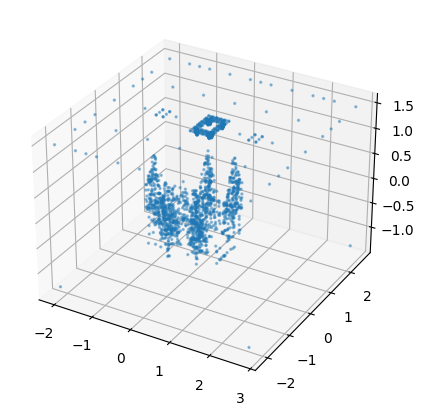

In [26]:
plot3d_points(X_dict_sample["pointCloud"][100, :,:])

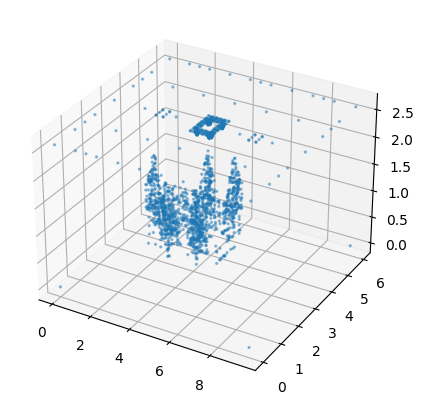

In [27]:
plot3d_points(pointCloud_dict["office28"])

# チューニング

In [28]:
office_list = list(df_total["office"].unique())
# # office_list = ["office1", "office2", "office3", "office4", "office5", "office6", ]

office_list

['office1',
 'office2',
 'office3',
 'office4',
 'office5',
 'office6',
 'office7',
 'office8',
 'office9',
 'office10',
 'office11',
 'office12',
 'office13',
 'office14',
 'office15',
 'office16',
 'office17',
 'office18',
 'office19',
 'office20',
 'office21',
 'office22',
 'office23',
 'office24',
 'office25',
 'office26',
 'office27',
 'office28',
 'office30',
 'office31',
 'office32',
 'office33']

In [29]:
test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
# test_office_list = ["office1", "office7", "office10", "office16", "office28", ]
# test_office_list = office_list

test_office_list

['office1', 'office7', 'office10', 'office16', 'office22', 'office28']

In [30]:
import datetime
import optuna

# OPTUNAのコンソール出力をOFFにする
optuna.logging.disable_default_handler()
# optuna.logging.enable_default_handler()

#チューニング中のログを出力するファイル
log_file = open('my_log_file.log', 'a')
log_file.write(
    '=============================================\n'
    +f'==============={datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}==============='
    +'\n'
)

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


92

In [31]:
# log_file.close()

In [32]:
# idealOffice_list = []

# for office in office_list:
#     df_office = df_total[df_total["office"]==office]
#     if df_office["countTimeMean_bin"].nunique() == 4:
#         idealOffice_list.append(office)
        

# office_list = idealOffice_list
# office_list

In [33]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17286039605216743197
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9812967424
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6215102238987568053
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-01-19 00:58:41.920322: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 00:58:42.459055: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9358 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [34]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [35]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input):
    """
    単純PointNet
    
    Parameters
    ----------
    trial
        OPTUNAのTrialオブジェクト
        
    input_pointCloud
        点群データ用のInputオブジェクト（Keras）
        
    Returns
    -------
    GlobalMaxPooling1D()
        全点のうちの最大値
        
    """
    
        
    hp_conv_layers = trial.suggest_int('conv_layers', 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [42]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/regression_CTM_onlyFloating_32offices.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    単純PointNetモデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    OPTUNAから呼び出され、ハイパーパラメータをチューニングする
    """
    
    input_list = []
    features_list = []
    for key, value in X_dict_sample.items():
        if key == "meta":
            # MetaData
            input_meta = keras.Input(shape=(len(value.columns), ), name='meta')
            
            # append metaData to input_list
            input_list.append(input_meta)

            # append metaData to features_list
            features_list.append(input_meta)
            
        elif key == "pointCloud":
            # PointCloud
            input_pc = keras.Input(shape=(value.shape[1], 3), name=key)

            # append pointClouds to input_list
            input_list.append(input_pc)

            # append feturesOfPointClouds to features_list
            features_list.append(myPointNet(trial, input_pointCloud=input_pc))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    # x = keras.layers.Dense(y_sample.nunique())(x)
    # outputs = keras.layers.Softmax()(x)
    
    output = keras.layers.Dense(1)(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=output, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        
        loss='mse',
        metrics=['mae'],
        
        # loss='sparse_categorical_crossentropy',
        # metrics=["sparse_categorical_accuracy"],
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    print("*** clear_session() occured ! ***", file=log_file)
    
    obj_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, 
                                                  df_ml, pointCloud_dict, "countTimeMean_onlyFloating",
                                                  standardize_pointCloud=True, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office],
                                              df_ml, pointCloud_dict, "countTimeMean_onlyFloating",
                                              standardize_pointCloud=True, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [4, 8, 16, 32, 64, 128])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 400,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            # callbacks = [EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0, patience=40)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        val_loss_list = history.history['val_loss'][-10:] #List of MSE
        # val_acc_list = history.history['val_sparse_categorical_accuracy'][-10:] #List of Accuracy
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        # acc_min = np.min(val_acc_list) #終盤のaccのmin（振動抑制が目的）
        obj_list.append(mse_max)
        
        print(
            f"(train, val): {([s.replace('office', '') for s in train_office_list], val_office)} {mse_max}",
            file=log_file
        )

    #交差検証の結果の平均値を目的関数
    return np.mean(obj_list)


db_path

'/mnt/MachineLearning/OptunaLog/regression_CTM_onlyFloating_32offices.db'

In [ ]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'
    
    fit_office_list = [office for office in office_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    #============= OPTUNA Optimization with RandomSampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        # direction='maximize',
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================
    
    
    #============= OPTUNA Optimization with TPESampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(),
        # direction='maximize',
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================


test_office: office1
test_office: office7


In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

In [ ]:
loaded_study = optuna.load_study(study_name='office1_is_test', storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)
keras.utils.plot_model(best_model, show_shapes=True)

In [ ]:
import pandas as pd

def plot_history(history:dict, ymax:float=None, fname:str=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss (categorical_crossentropy)")
    
    if ymax is not None:
        plt.ylim(0., ymax)
        
    if fname is not None:
        plt.savefig(fname.replace(".", "_loss."))
        
    plt.show()
    
    #=====================================================

    acc_df = history_df[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0., 1.)
    if fname is not None:
        plt.savefig(fname.replace(".", "_acc."))
    plt.show()

## チューニングの再現

In [ ]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    fit_office_list = [office for office in office_list if office != test_office]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]

    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict,
                                              objective_col="countTimeMean_onlyFloating", shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_onlyFloating", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 400,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=40),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


In [ ]:
tb_log_dir

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard  --logdir $tb_log_dir

In [ ]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [ ]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_onlyFloating", shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                            objective_col="countTimeMean_onlyFloating", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 400,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


In [ ]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=2.)

# 特定のオフィスに対して最終テストおよびその他考察

In [ ]:
"""
最終テスト
only office1
"""

test_office="office1"

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
best_model = total_model_builder(best_trial)

keras.utils.plot_model(best_model, show_shapes=True)

In [ ]:
best_model = total_model_builder(best_trial)

fit_office_list = [office for office in office_list if office != test_office]

X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_onlyFloating", shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_onlyFloating", shuffle=False)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    # batch_size = loaded_study.best_params["batch_size"],
    batch_size = 32,
    epochs = 1000,
    validation_data = (X_dict_test, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=200, restore_best_weights=True,)]
)


In [ ]:
plot_history(test_history.history, ymax=2.)

In [ ]:
y_fit_pred_softmax = best_model.predict(X_dict_fit)
y_test_pred_softmax = best_model.predict(X_dict_test)

In [ ]:
y_fit_pred = y_fit_pred_softmax.argmax(axis=1)
y_test_pred = y_test_pred_softmax.argmax(axis=1)

In [ ]:
result_df = pd.DataFrame({"correct":y_test, "predict":y_test_pred})
result_df["match"] = (result_df["correct"] == result_df["predict"])
result_df

In [ ]:
from sklearn.metrics import accuracy_score

print("train_acc: ", accuracy_score(y_fit, y_fit_pred))
print("test_acc: ", accuracy_score(y_test, y_test_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_fit, y_fit_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Reds')

In [ ]:
y_fit.to_numpy().shape

In [ ]:
X_dict_fit["meta"].index

In [ ]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [ ]:
X_dict_fit

In [ ]:
df_total

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def plot_RoI_level(df_total:pd.DataFrame):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = df_total["office"].unique()
    classification_level = df_total["countTimeMean_bin"].nunique()
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=unique_office, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office name")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

In [ ]:
plot_RoI_level(df_total)

In [ ]:
import gc
 
gc.collect()

In [ ]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()